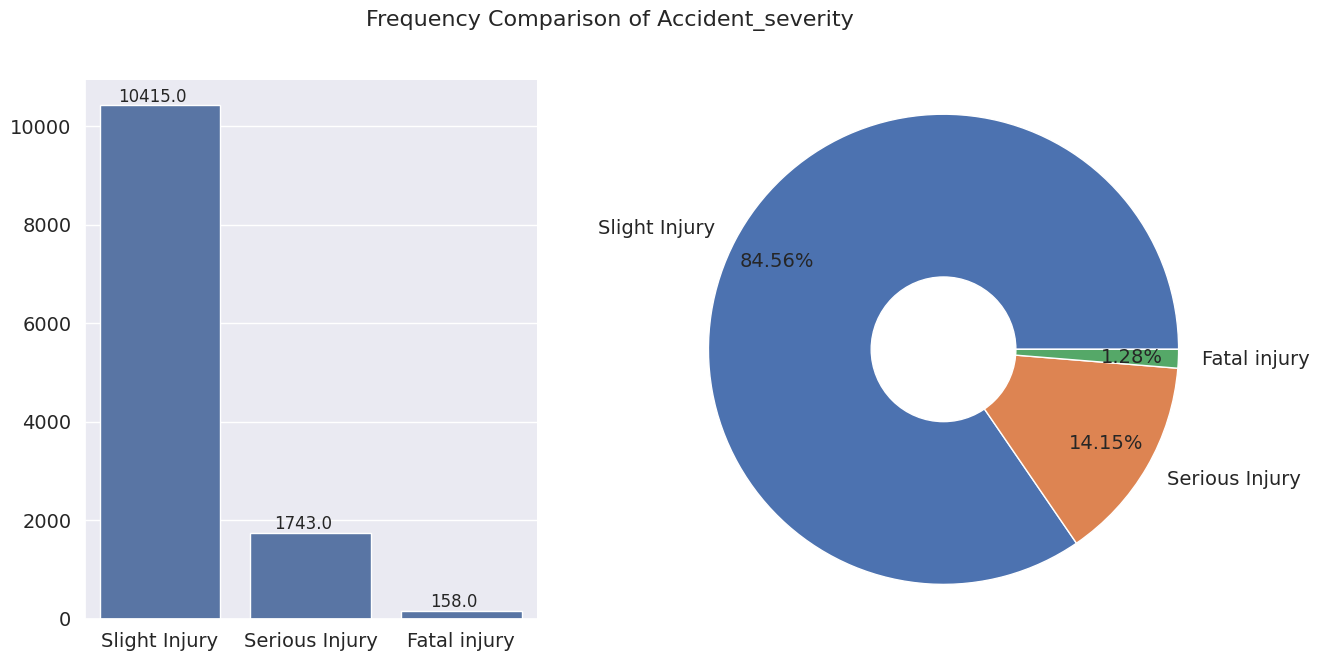

In [ ]:
import time, os
from datetime import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold,  GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import imblearn
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

!pip install --quiet shap==0.39.0
import shap

# Warning suppression
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/RTA Dataset.csv')
def add_annotations(ax):
    for p in ax.patches:
        frequency = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(f'{frequency}', (x, y), size = 12, ha = 'center', va = 'bottom')

# Visualization
def count_donut(data, col):
    plt.figure(figsize = (14, 7))

    # Countplot
    ax1 = plt.subplot(1, 2, 1)
    count = sns.countplot(x = data[col])
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    sns.despine(top = True, right = True)
    add_annotations(ax1)

    # Donutplot
    ax2 = plt.subplot(1, 2, 2)
    plt.pie(data[col].value_counts(),
            labels = data[col].unique().tolist(),
            autopct = '%1.2f%%',
            pctdistance = 0.8,
            shadow = False,
            radius = 1.3,
            textprops = {'fontsize' : 14}
            )
    circle = plt.Circle((0, 0), 0.4, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    ax2.set_xlabel('')

    plt.suptitle("Frequency Comparison of {}".format(col), fontsize = 16)
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
count_donut(data, 'Accident_severity')

In [ ]:
# Variables except 'Accident_severity' and 'Time'
features_others = [x for x in data.columns.tolist() if x not in ['Accident_severity', 'Time']]

# List of features with horizontal xtickmarks (for others we shall make it vertical for visualization convenience)
features_horiz = ['Sex_of_driver', 'Vehicle_driver_relation', 'Defect_of_vehicle', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Sex_of_casualty', 'Casualty_severity']
# Catplot to compare frequency distributions of features (except 'Time') across target classes
for feature in features_others:
    plt.figure(figsize = (10, 5))
    catplot = sns.catplot(data = data, x = feature, col = 'Accident_severity', kind = 'count', sharey = False)
    if feature not in features_horiz:
        catplot.set_xticklabels(rotation = 90)
    plt.suptitle("Frequency distribution of {} by target class".format(feature), y = 1.1, fontsize = 15)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.